
# Detección de preferencias e impacto de factores externos


Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Iniciacion" data-toc-modified-id="Iniciacion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Iniciacion</a></span></li><li><span><a href="#Exploracion-de-datos" data-toc-modified-id="Exploracion-de-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploracion de datos</a></span><ul class="toc-item"><li><span><a href="#Tabla-company_trips:" data-toc-modified-id="Tabla-company_trips:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>Tabla company_trips</code>:</a></span></li><li><span><a href="#Tabla-Dropoff" data-toc-modified-id="Tabla-Dropoff-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>Tabla Dropoff</code></a></span></li><li><span><a href="#Tabla-trips_to_airport" data-toc-modified-id="Tabla-trips_to_airport-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>Tabla trips_to_airport</code></a></span></li></ul></li><li><span><a href="#Analisis-de-datos" data-toc-modified-id="Analisis-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analisis de datos</a></span></li><li><span><a href="#Comprobación-de-Hipótesis:" data-toc-modified-id="Comprobación-de-Hipótesis:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comprobación de Hipótesis:</a></span></li><li><span><a href="#Conclusion-General" data-toc-modified-id="Conclusion-General-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion General</a></span></li></ul></div>


 ## Iniciacion 



Carga de librerias y datos

In [1]:
#Cargaremos las librerias 

import pandas as pd
import matplotlib.pyplot as plt #Creacion de graficos
import seaborn as sns  # Visualizacion de datos
import numpy as np  # Calculo matematico y estadistico 
from scipy.stats import ttest_ind  #  realiza una prueba t de dos muestras independientes. 

In [2]:
#Carga de datos

try: #anaconda
    company_trip = pd.read_csv('moved_project_sql_result_01.csv')
    dropoff = pd.read_csv('moved_project_sql_result_04.csv')
    trips_to_airport = pd.read_csv('moved_project_sql_result_07.csv')
    
except: #jupyter
    company_trip = pd.read_csv('/datasets/moved_project_sql_result_01.csv')
    dropoff = pd.read_csv('/datasets/moved_project_sql_result_04.csv')
    trips_to_airport = pd.read_csv('/datasets/moved_project_sql_result_07.csv')
    

In [3]:
# Carga de funciones establecidas

def data_info(df):
    print('---------------------------------------')
    print('Filas y columnas: \n{}'.format(df.shape))
    print()
    print('Informacion general:')
    print(df.info())
    print()
    print('Primeras cinco columnas: \n{}'.format(df.head()))
    print()
    print('Detalles estadisticos: \n{}'.format(df.describe()))
    print()
    print('Cuantos duplicados hay?\n')
    print('Hay {} datos duplicados.'.format(df.duplicated().sum()))
    print()
    print('Valores ausentes ?')
    print(df.isna().sum(),'\n')
    print('Porcentaje de valores ausentes \n')
    print(df.isna().mean().reset_index())
    print('---------------------------------------')

 ##   Exploracion de datos ###

### `Tabla company_trips`: ### 

La tabla company_trips contiene los siguientes datos:

    company_name: nombre de la empresa de taxis
    trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017



In [4]:
data_info(company_trip)

---------------------------------------
Filas y columnas: 
(64, 2)

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras cinco columnas: 
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Detalles estadisticos: 
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Cuantos duplicados hay?

Hay 0 datos duplicados.

Valores a

La tabla company_trips consta de 2 columnas (company_name y trips_amount) y 64 líneas. Los nombres de las columnas son adecuados, no hay valores ausentes y los tipos de datos están correctos.

### ` Tabla Dropoff` ### 


La tabla dropoff contiene los siguientes datos:

    dropoff_location_name: barrios de Chicago donde finalizaron los viajes
    average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017



In [5]:
data_info(dropoff)

---------------------------------------
Filas y columnas: 
(94, 2)

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

Primeras cinco columnas: 
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Detalles estadisticos: 
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Cuantos duplicados hay?

Hay 0 datos duplicados.

Valores ausentes ?

La tabla dropoff también consta de 2 columnas (dropoff_location_name y average_trips) y 94 líneas. Los nombres de las columnas son correctos, no hay valores ausentes y los tipos de datos son correctos, sin embargo pasaremos los promedios a valores enteros para facilitar su lectura.

In [6]:
#Convertiremos los datos a enteros

dropoff['average_trips'] = dropoff['average_trips'].astype(int)
print(dropoff.head(5))

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546


### `Tabla trips_to_airport` ### 

La tabla trips_to_airport contiene los siguientes datos:

    start_ts: fecha y hora de recogida
    weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
    duration_seconds: duración del viaje en segundos



In [7]:
data_info(trips_to_airport)

---------------------------------------
Filas y columnas: 
(1068, 3)

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Primeras cinco columnas: 
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Detalles estadisticos: 
       duration_seconds
count       1068.000000
mean        2071.731273
std          769

En esta tabla hay que hacer las siguientes correcciones. 


1- Modificar a formato fecha la columna start_ts

2- Modificar a entero la columna duration_second

2- Revisar los que duraron 0 segundos

3- Eliminar los duplicados 

In [8]:
# Cambiar formato de columnas 

trips_to_airport['start_ts'] = pd.to_datetime(trips_to_airport['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Cambiar formato de duration_second

trips_to_airport['duration_seconds'] = trips_to_airport['duration_seconds'].astype(int)

## Analisis de datos

**Identificar los 10 principales barrios en términos de finalización del recorrido**

In [9]:
#Ordenamos de mayo a menor y seleccionamos los primeros 10

top_dropoff = dropoff.sort_values(by='average_trips', ascending=False).head(10)

print(top_dropoff)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9523
2         Streeterville           6664
3             West Loop           5163
4                O'Hare           2546
5             Lake View           2420
6            Grant Park           2068
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1259


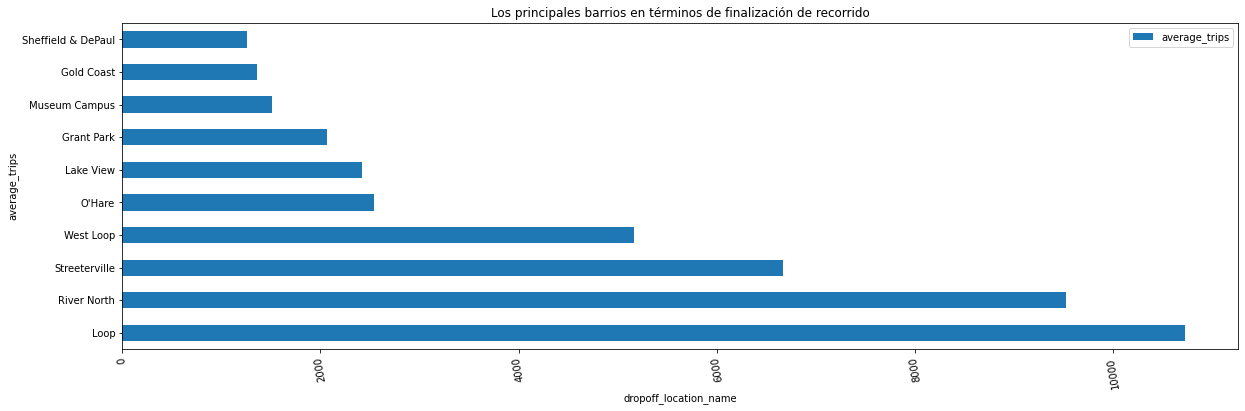

In [10]:
# gragico de barra 

top_dropoff.plot(x='dropoff_location_name', kind='barh', figsize=(20,6))
plt.xlabel('dropoff_location_name')
plt.xticks(rotation=100)
plt.ylabel('average_trips')
plt.title('Los principales barrios en términos de finalización de recorrido')
plt.show(block=False)



**Los principales compañías que realizan más viajes**

In [11]:
#Ordenamos de mayo a menor y seleccionamos los primeros 10

top_company_trip = company_trip.sort_values(by='trips_amount', ascending=False).head(10)
print(top_company_trip)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


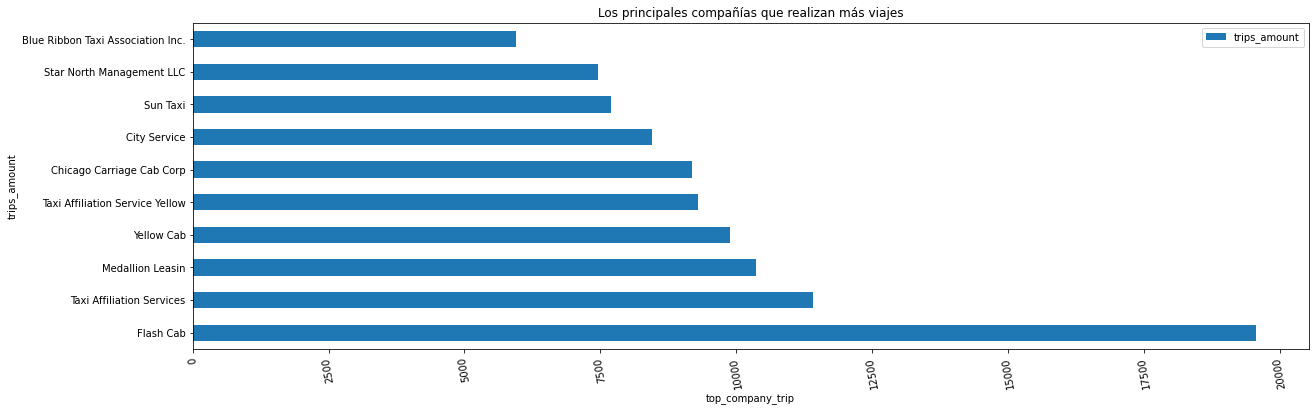

In [12]:
top_company_trip.plot(x='company_name', kind='barh', figsize=(20,6))
plt.xlabel('top_company_trip')
plt.xticks(rotation=100)
plt.ylabel('trips_amount')
plt.title('Los principales compañías que realizan más viajes')
plt.show(block=False)


**Conclusiones** 

El  barrio que tiene más  finalización de recorrido es Loop con más de 1000 Viajes. 

Luedo de haber seleccionado las 10  compañias de taxis más usadas se determino que la compañia Flasj Cab es la preferrida de los usuarios, tiene un registro promedio de casi 2000 viajes. por otro lado, taxi afiliation services es la segunda, pero con un promedio de 1100 viajes recolectados. a pesar de estar tener el segundo lugar, Flash  Cab la supera el doble 

se deLas compañias de taxis mas usadas son :
    
    Flash cab
    
    Taxi afiliation
    
    Modelion
    
    Yellow Cab
    
    Taxi afiliation servive yellow
    

    


## Comprobación de Hipótesis: ##

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Para ello generaremos las dos sentencias siguientes:

H0: La duración promedio de los viajes no cambia en los sábados lluviosos

Ha: La duración promedio cambia

Nivel de significacion = 0.5

In [13]:
# Creamos dos Dataframe que uno incluya la variabble lluvioso y otro no

bad_weather_duration = trips_to_airport.loc[trips_to_airport["weather_conditions"] == 'Bad', "duration_seconds"]
good_weather_duration = trips_to_airport.loc[trips_to_airport["weather_conditions"] == 'Good', "duration_seconds"]


# Calculamos los promedios
 
mean_bad_weather = bad_weather_duration.mean()
mean_good_weather = good_weather_duration .mean()

print(f"""
    Duración promedio de viajes en días lluviosos: {mean_bad_weather}
    Duración promedio de viajes en días soleados: {mean_good_weather}
""")

#Realizamos el test de hipotesis 
stat, p_value = ttest_ind(bad_weather_duration, good_weather_duration, equal_var=False)

significance = 0.05

print(f"""
    t-estadístico: {stat}
    valor-p: {p_value}
    {"Rechazamos" if p_value < significance 
    else "No rechazamos"} nuestra hipótesis nula
""")



    Duración promedio de viajes en días lluviosos: 2427.2055555555557
    Duración promedio de viajes en días soleados: 1999.6756756756756


    t-estadístico: 7.186034288068629
    valor-p: 6.738994326108734e-12
    Rechazamos nuestra hipótesis nula



Rechazamos la hipotesis nula, la duracion del viaje varia segun el clima 

## Conclusion General ##

En este estudio se utilizaron tres tablas: 

- la tabla company_trips con 2 columnas (company_name y trips_amount) y 64 filas,

- la tabla dropoff con 2 columnas (dropoff_location_name y average_trips) y 94 fila

- la tabla trips_to_airport con 3 columnas (start_ts, weather_conditions y duration_seconds) y 1068 filas. 

Ambas tablas iniciales estaban completas y los datos se presentaron correctamente. Se convirtió la columna average_trips en valores enteros para facilitar la lectura de los datos, y se cambió el tipo de datos de la columna start_ts a DateTime en la tabla trips_to_airport.

Para analizar los datos de las compañias de taxi más usadas y la ciudad 
De las tablas se puede concluir que los diez barrios con más finalización de recorridos son: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast y Sheffield & DePaul, en ese orden.


En cuanto a las empresas de taxis, se observa que de las 63 compañías en la tabla, la mayoría realizó menos de 5000 viajes en los días estudiados. Flash Cab realizó la mayor cantidad de viajes, casi 20000, seguida de Taxi Affiliation Services con un poco más de 10000.


Se planteó la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Se creó una hipótesis nula que establecía que la duración promedio de los viajes no cambia en los sábados lluviosos. Según los resultados obtenidos en el estudio, se rechazó la hipótesis nula.